In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import math
import random

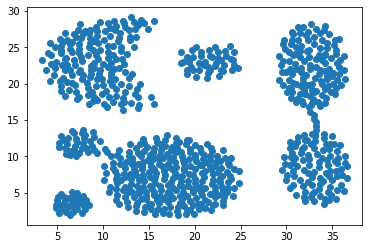

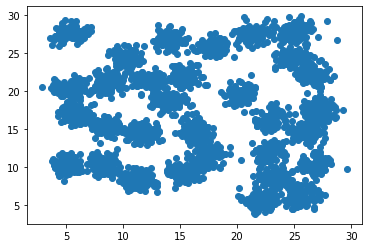

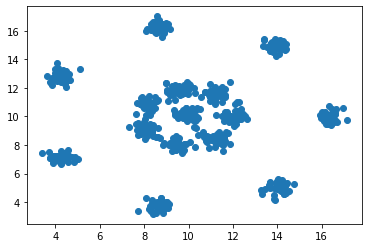

In [2]:
def read_funny_csv(filehandle):
    data = list()
    split_pattern = re.compile('\s+')
    num_columns = 2
    for line in filehandle:
        parts = split_pattern.split(line.strip())
        data.append(parts[-num_columns:])
    return data

with open("D:\\2022autumn\ml\ml_2022_f-master\lab\lab4\Datasets\Aggregation.txt", 'r') as filehandle:
    data = read_funny_csv(filehandle)
df1 = pd.DataFrame( data=data, columns=[0,1],dtype='float64')
with open("D:\\2022autumn\ml\ml_2022_f-master\lab\lab4\Datasets\D31.txt", 'r') as filehandle:
    data = read_funny_csv(filehandle)
df2 = pd.DataFrame( data=data, columns=[0,1],dtype='float64')
with open("D:\\2022autumn\ml\ml_2022_f-master\lab\lab4\Datasets\R15.txt", 'r') as filehandle:
    data = read_funny_csv(filehandle)
df3 = pd.DataFrame( data=data, columns=[0,1],dtype='float64')
#plt.axis('off')
plt.scatter(df1.loc[:,0],df1.loc[:,1])
plt.show()
#plt.axis('off')
plt.scatter(df2.loc[:,0],df2.loc[:,1])
plt.show()
#plt.axis('off')
plt.scatter(df3.loc[:,0],df3.loc[:,1])

In [3]:
def distance(y1,y2):
    y11=np.array(y1)
    y22=np.array(y2)
    return np.linalg.norm(y11-y22,ord=2)
def gussian_dis(y1,y2):
    return math.exp(-(distance(y1,y2))*(distance(y1,y2)))
class clusters(object):
    def __init__(self,dataset):
        self.ds=dataset
        self.centers=None#记录中心点
        # self.oods=None#记录out of cluster
        self.m=len(dataset.index)#数据大小
        self.d=np.ones(self.m)*float('inf')#δ
        self.master=np.zeros(self.m)
        self.ro=np.zeros(self.m)#ρ
        self.dc=0.1
        self.sort_index=None
        self.num=0
        self.brodro=None
        self.dis=None

        self.ro_threshold=20
        self.delta_threshold=10
    def calc_dis(self):
        self.dis=np.zeros(shape=(self.m,self.m))
        for i in range(self.m):
            for j in range(self.m):
                if i>j:
                    self.dis[i,j]=distance(self.ds.loc[i,:],self.ds.loc[j,:])
                    self.dis[j,i]=distance(self.ds.loc[i,:],self.ds.loc[j,:])
    def calculate_dis_row(self):
        self.ro=np.zeros(self.m)
        for i in range(self.m):
            for j in range(self.m):
                if i>=j:
                    continue
                # if (self.dis[i,j]<self.dc):
                #     self.ro[i]+=1
                #     self.ro[j]+=1
                self.ro[i]+=math.exp(-self.dis[i,j]**2)
                self.ro[j]+=math.exp(-self.dis[i,j]**2)
        self.biggest_ro=np.max(self.ro)
        self.sort_index=np.argsort(-self.ro)
        #print(self.sort_index)
        self.d=np.ones(self.m)
        self.d[self.sort_index[0]]=0
        self.master[self.sort_index[0]]=self.sort_index[0]
        for i in range(self.m):
            ii=self.sort_index[i]
            for j in range(self.m):
                jj=self.sort_index[j]
                if j==0:
                    self.d[jj]=max(self.d[jj],self.dis[ii,jj])
                    continue
                t=self.dis[ii,jj]
                
                #print(t)

                if i<j and t<self.d[jj]:
                    self.d[jj]=t
                    self.master[jj]=ii
    def determine_centers(self):
        mm =np.where(self.ro>=self.ro_threshold)
        nn=np.where(self.d>=self.delta_threshold)
        self.centers=np.intersect1d(mm,nn)
        self.num=len(self.centers)
        self.brodro=np.zeros(self.num)
    def determine_every_point_cluster(self):
        for i in self.centers:
            self.master[i]=i
        for i in range(self.m):
            ii = self.sort_index[i]
            if ii in self.centers:
                continue
            else:
                self.master[ii]=self.master[(int)(self.master[ii])]
    def reduce_noise(self):
        for i in range(self.m):
            for j in range(self.m):
                if i>j and (self.dis[i,j]<=self.dc) and (self.master[i]!=self.master[j]):
                    ii=self.centers==self.master[i]
                    jj=self.centers==self.master[j]
                    #print(self.brodro[ii])
                    ro_ave=(self.ro[i]+self.ro[j])/2
                    if (ro_ave>self.brodro[ii]):
                        self.brodro[ii]=ro_ave
                    if (ro_ave>self.brodro[jj]):
                        self.brodro[jj]=ro_ave
        for i in range(self.m):
            ii=self.centers==self.master[i]
            if (self.ro[i]<self.brodro[ii]):
                self.master[i]=-1
#print(cl1.d)

In [12]:
cl1=clusters(df2)
cl1.calc_dis()

In [61]:
cl2=clusters(df2)
cl2.dis=cl1.dis

In [62]:
cl2.dc=0.1
cl2.calculate_dis_row()
#print(cl1.ro)

23.04448417669617
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


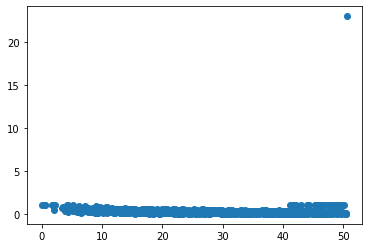

In [63]:
plt.scatter(cl2.ro,cl2.d)
aaa=np.argsort(-cl2.d)
for i in range(30):
    print(cl2.d[aaa[i]])

In [64]:
cl2.delta_threshold=1
cl2.ro_threshold=41
cl2.determine_centers()
print(cl2.num)
for i in range(cl2.num):
    print(cl2.centers[i])
print((cl2.num))

31
83
188
292
393
484
556
688
789
837
963
1077
1132
1273
1373
1444
1520
1677
1766
1820
1933
2006
2181
2227
2314
2492
2576
2683
2740
2804
2972
3016
31


In [65]:
cl2.determine_every_point_cluster()

34


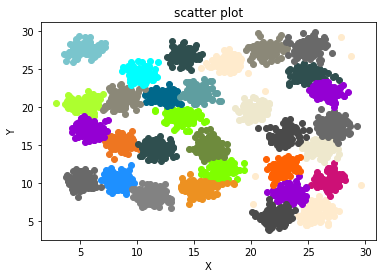

In [66]:
import random
fig=plt.figure()
ax1=fig.add_subplot(111)
colors = ['#ED9121','#7FFF00','#5F9EA0','#7AC5CD','#FF6103','#0000CD','#FFEBCD','#838B8B','#00FFFF','#6E8B3D','#483D8B','#9400D3','#CD1076','#696969','#1E90FF','#FF3030','#8B7500','#4A4A4A','#ADFF2F','#EE7621','#EEE8CD','#8B8878','#828282','#8B6914','#8B7500','#00C957','#00688B','#00688B','#9400D3','#79CDCD','#2F4F4F','#2F4F4F','#EE2C2C','#BDB76B']
print(len(colors))
ax1.set_title('scatter plot')
plt.xlabel('X')
plt.ylabel('Y')
for i in range(cl2.num):
    ramdomindex=random.randrange(len(colors))
    ax1.scatter(cl2.ds.loc[cl2.master==cl2.centers[i],0],cl2.ds.loc[cl2.master==cl2.centers[i],1],c=colors[ramdomindex],marker='o')
plt.show()

[0.]
[24.21105653]
[0.]
[0.]
[0.]
[0.]
[25.44523427]
[27.63112184]
[0.]
[29.60585632]
[23.85813677]
[0.]
[32.35734966]
[32.35734966]
[30.96507319]
[34.04613066]
[34.04613066]
[34.04613066]
[34.04613066]
[34.04613066]
[0.]
[27.3948505]
[28.7295159]
[28.7295159]


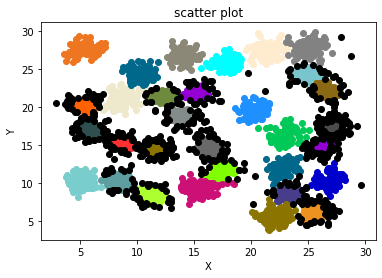

In [67]:
cl2.dc=0.45
fig=plt.figure()
ax1=fig.add_subplot(111)
cl2.reduce_noise()
ax1.set_title('scatter plot')
plt.xlabel('X')
plt.ylabel('Y')
for i in range(len(cl2.centers)):
    ax1.scatter(cl2.ds.loc[cl2.master==cl2.centers[i],0],cl2.ds.loc[cl2.master==cl2.centers[i],1],c=colors[i],marker='o')
ax1.scatter(cl2.ds.loc[cl2.master==-1,0],cl2.ds.loc[cl2.master==-1,1],c='k',marker='o')
plt.show()

In [68]:
from sklearn.metrics import davies_bouldin_score
print(davies_bouldin_score(cl2.ds,cl2.master))

0.6018076631335458
